<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION WITH SCIKIT LEARN
the rail in australia dataset contains about 10 years of daily weather obseratin from numerous australian wather statios.
as a data sciestist at the berueu of meteorilory , you are tasked with creating a fully automated system that can use today wether data for a given location to predict whether it will rain at the location tomorrow.


## LINEAR REGRSSION VS LOGISTIC REGRESSION .

logistic regrssion is better suited for classification problims like predicting whether it will rain tomorrow. identyifn whether a given problem si a classifcatgion or regrssion problem is a importatn fist step in machine learnig .

### CLASSIFICATION PROBLEMS

problems where each inputs must be assigned a descrete category (also called label or class ) are known as classifcation prblems .

regrssion problmes: problesm where a continous numeric valeu must be predicted for each input are known as regrssion problems .

linear regrssion is a commonly used technique for solving regrssion problesm . in a linear regrssion model . the target is modeletd as a linear combination ( or weighted sum ) for inputs featurs .
the predcition from the model are evalutaed using a loss function like the root mean squred errol

logistic regrssion for solving classfication problems in a logistic regrssion model

- we take linear combination ( or weighted sum of the inputs featurs)

- we apply the sigmoid fucntion to the result to obtain a number between 0 and 1 .

- this number represent the probalility of th einput being clasfied as yes .
- intead of RMSE , the cross entropy loss funciton is used to evalutea the resltus .

the output of the sigmoid funciton is called a logistic , hence the name logistic regrssion . for a methematical discussion of logistic regrsssion.

### MACHINE LEARNIGN WORKFLOW

whether were solving a regrssion problem usng linear regrssion or a classifcation problem using logistic regrssion , the workflow for training a model is exactly the same

1 we initialize a model  with random parametesr
1 we pass some inputs into the model to optina predictions .
1 we compare the mdoel prediction with the actual tragets usn the loss funcion
1 we use an optimation techine to reduct he loss by adust it weithgs and biases of the model
1 we repeat steps 1 to 4 till the prediction from model are good enouth  



classificaiont and regrssion are both supervised machien leanring problesm , bexuase they use labeled data . machien leaning applied to unlabed data is know as unsupervised leanig .



In [2]:
!pip install scikit-learn --upgrade --quiet

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od
od.version()

'0.1.22'

In [5]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lewisnjue
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:01<00:00, 3.50MB/s]


In [6]:
import os


In [7]:
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [8]:
train_csv = data_dir + '/weatherAUS.csv'

In [9]:
!pip install pandas --quiet

In [10]:
import pandas as pd


In [11]:
raw_df = pd.read_csv(train_csv)

In [12]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


the data set contains over 145,000 rows and 23 coulumsn  the datset containes date,numeirc and categorical columsn our objective is to crate a model to predict the valeu int eh colum raintomorrow .
lets check the data tyep and mission lvalue int eh valris colums

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

while we should be able to fill the missing values most columsn , it might be a good idea to discard the rows where teh value of rain tomorrow or tain tody is missign to make our anslysis and modeling simpler ( since one of htem is the target variable and athe other is likely to e very closely related to the target variable ) .


In [14]:
raw_df.dropna(subset=['RainTomorrow','RainToday'], inplace=True)

## EXPLORATORY DATA ANALYSIS AND VISUALIZATION
befor trainign machine learing model , its always a good idea to explore the distrubutosn of valrisou columns and see how they are related to the target coumn . tes explore and visulaize the data uisng the ploty , matplotlib and seaborn lbiryr

In [15]:
!pip install plotly matplotlib seaborn  --quiet

In [16]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# setting the default syles
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
px.histogram(raw_df, x='Location',title='location vs . rain days',color='RainToday')


In [19]:
px.histogram(raw_df,x='Temp3pm',title='temperature at 3 pm vs rain tomorrow',color='RainTomorrow')

In [20]:
px.histogram(raw_df,x='RainTomorrow',color='RainToday',title='rain today vs rain tomorrow')

In [21]:
px.scatter(raw_df.sample(2000),title='min temp vs max temp',x='MinTemp',y='MaxTemp',color='RainToday')

In [22]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

## (optional ) working with sample
when working with massive datasets containig millions of rows , its a good idea to work with a sample initailly , to quickly set up your model training notebook .
it yoru like to work with a sample just set the value of use_sample to True .

In [23]:
use_sample = False
sample_fraction = 0.1
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()


make sure to set use_sample to false and re run the notbook end to end onece yor ready to ue the entire dataset .

## TRAINIGN , VALIDATION AND TEST SETS .

while building real world machine learing models. it is quite common to split the dataset into three parts :

- trainging set - used to train the model ie compute the loss and adust the models weights using an optimzation technique .
- validation set  used to evaluate the model during training tune model hyperpatemeters ( optimazation technique , redgulatlzaeo ) and pick the best version of the model . picking a ood
validation set is eassentail for training model that generalize well .

- test set  used to compare diffrent model or approaches and report the mdoel findal accuracly for may datasets, test sets are proivded separately . the test set should reflect he ding of dat the mode will encoter in the real world as closely as feassible .

as a general rule of thumb you can use aroudn 60% of the data for the training set , 20% for the varidation set and 20% for the test set . it a seperate test se tis already provided youc an use 75% to 25% trainginvariadion split .
when rows in the dataset have no inherent order .its common practive to pick ranodm subsets of rows for creating test anc varidation sets . this can bedone using thetrain_set_split utility from scikit-learn .


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
 train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [28]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


however while working with dataes , its often a better idea to separet eh trining , validation and test sets whith time , so that the model is trainine don the data from the past and evalutated on the data from the future .
for the current dataset , we can use the date column in the dataset to crate another colun for year well pick the last two yeare for the test set ,and one year before for the varidation set


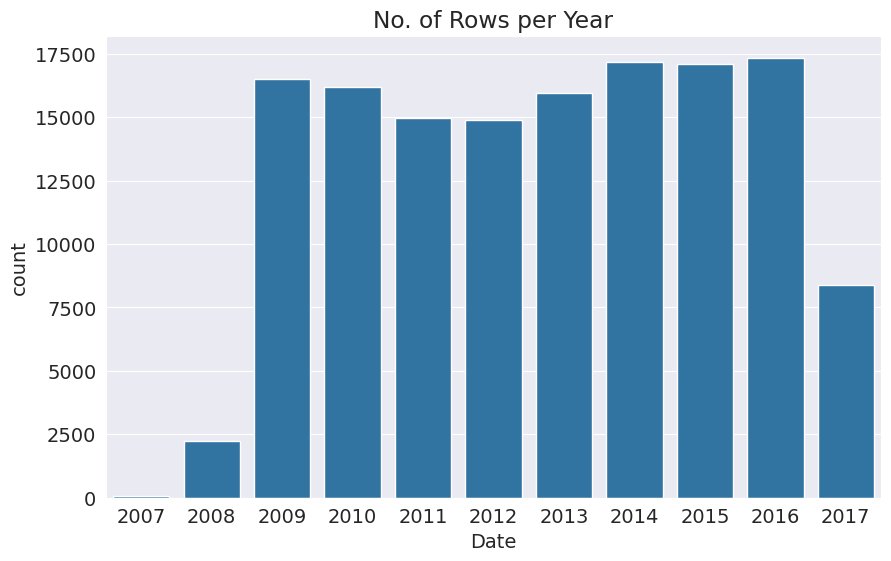

In [29]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [30]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [31]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [32]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [33]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [34]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
